# Challenge Problem
Remember, you need to do at least two of these challenge problems during the quarter.

Look at the US EPA [AirNow API](https://docs.airnowapi.org). You'll need to register for your own API key - click on Log In and follow the steps to request an account. You'll get your key within a minute.

Once you a logged in, look at the Web Services, and then Observations by Monitoring Site. If you click on the Query Tool, you can build up a query in the point-and-click interface. This will help you understand the API syntax.

Back in Python, use the `requests` library to get all the data for PM 2.5 for each day in 2021, in the approximate LA County area (you might have to play around with the bounding box). Return this as a pandas dataframe.

Put this in a function that takes at least one argument. For example, you could write a function where you pass the year, or the pollutant type. Your function should return a dataframe with the results of your API query.

Then, map or plot the data in whatever way you choose (e.g. boxplots or line charts of pollution levels). 

If you want to map it, [here's some advice on how to convert a pandas dataframe into a geodataframe](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html), using the lat and lon columns returned by the API. 

import json
import pandas as pd
import requests
import geopandas 

#I requested data from the southwest of LA County for the year 2021. LA County to too large to request on its own. 

requestString = 'https://www.airnowapi.org/aq/data/?startDate=2021-01-01T03&endDate=2021-12-31T03&parameters=PM25&BBOX=-118.495522,33.927767,-117.847328,34.255303&dataType=A&format=application/json&verbose=1&monitorType=0&includerawconcentrations=0&API_KEY=4D443089-5C44-482F-8311-A46004897DA2'
r = requests.get(requestString)
d = json.loads(r.text)

df = pd.DataFrame(d) #convert to dataframe
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude)) #convert to geodataframe
gdf

In [9]:
import json
import pandas as pd
import requests
import geopandas 
startDate = '2021-01-01T00'
endDate = '2021-01-03T23'
requestString = 'https://www.airnowapi.org/aq/data/?startDate={}&endDate={}&parameters=PM25&BBOX=-118.95,33.71,-117.65,34.83&dataType=C&format=application/json&verbose=0&monitorType=0&includerawconcentrations=0&API_KEY=4D443089-5C44-482F-8311-A46004897DA2'.format(startDate, endDate)
r = requests.get(requestString)
d = json.loads(r.text)
df = pd.DataFrame(d) #convert to dataframe
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude)) #convert to geodataframe
print(gdf)

      Latitude   Longitude               UTC Parameter   Unit  Value  \
0    34.210170 -118.870510  2021-01-01T00:00     PM2.5  UG/M3    0.6   
1    34.404280 -118.809980  2021-01-01T00:00     PM2.5  UG/M3    0.0   
2    34.276320 -118.683690  2021-01-01T00:00     PM2.5  UG/M3    1.0   
3    34.199200 -118.533100  2021-01-01T00:00     PM2.5  UG/M3    2.7   
4    34.383300 -118.528300  2021-01-01T00:00     PM2.5  UG/M3    2.6   
..         ...         ...               ...       ...    ...    ...   
783  33.901400 -118.205000  2021-01-03T23:00     PM2.5  UG/M3   13.5   
784  33.792221 -118.175278  2021-01-03T23:00     PM2.5  UG/M3   12.4   
785  34.669589 -118.130689  2021-01-03T23:00     PM2.5  UG/M3    1.1   
786  33.830586 -117.938509  2021-01-03T23:00     PM2.5  UG/M3    7.0   
787  34.143900 -117.850800  2021-01-03T23:00     PM2.5  UG/M3    9.9   

                        geometry  
0    POINT (-118.87051 34.21017)  
1    POINT (-118.80998 34.40428)  
2    POINT (-118.68369 34.2763

In [10]:
gdf = gdf.set_crs('epsg:3857')
gdf.crs 

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Median Household Income, City of Oakland')

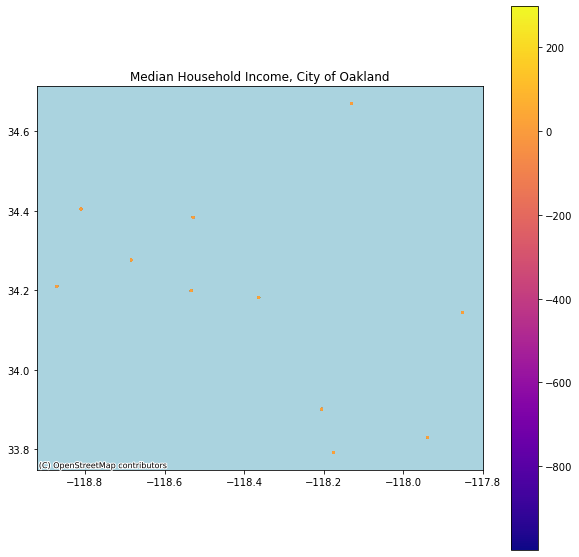

In [23]:


import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(1,1,figsize=(10,10))

gdf.to_crs('EPSG:3857').plot('Value', ax=ax, markersize=2,  cmap='plasma', legend=True, 
               legend_kwds={'orientation': 'vertical'})
ax.set_facecolor('k')
ctx.add_basemap(ax=ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title('Median Household Income, City of Oakland')


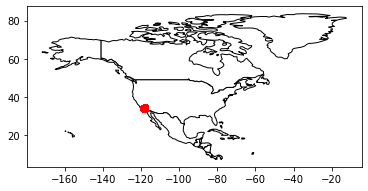

In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [ ]:


def AQI(startDate, endDate):
    requestString = 'https://www.airnowapi.org/aq/data/?startDate={}&endDate={}&parameters=PM25&BBOX=-118.95,33.71,-117.65,34.83&dataType=A&format=application/json&verbose=0&monitorType=0&includerawconcentrations=0&API_KEY=4D443089-5C44-482F-8311-A46004897DA2'.format(startDate, endDate)
    r = requests.get(requestString)
    d = json.loads(r.text)
    df = pd.DataFrame(d) #convert to dataframe
df